## Import libraries

In [627]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.color_palette('pastel')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

## Import dataset

In [628]:
dataset = pd.read_csv("kidney_disease.csv")
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Dropping the Id column

In [629]:
dataset.drop('id', axis=1, inplace=True)

## Dataset information

In [630]:
print("Dataset shape:",dataset.shape)

Dataset shape: (400, 25)


In [631]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

## Choosing categorical & numerical data

In [632]:
cats = dataset.select_dtypes('object').columns
nums = dataset.select_dtypes('float64').columns

print('Categorical columns: ', cats)
print('Numerical columns: ', nums)

Categorical columns:  Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
Numerical columns:  Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')


## Finding & replacing anomaly data in categories

In [633]:
for column in cats:
    print(column, dataset[column].unique())

rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
pcv ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
wc ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '

In [634]:
dataset.replace('\t', np.nan, inplace= True)
dataset.replace('\t?', np.nan, inplace= True)
dataset.replace({'\t':''}, regex=True, inplace= True)
dataset.dm.replace({' ':''}, regex=True, inplace= True)

In [635]:
for column in cats:
    print(column, dataset[column].unique())

rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
pcv ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
wc ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9

## Changing the type of columns

In [636]:
dataset[['pcv', 'wc', 'rc']] = dataset[['pcv', 'wc', 'rc']].astype('float64')
nums = dataset.select_dtypes('float64').columns
cats = dataset.select_dtypes('object').columns

## Null values & duplicates

In [637]:
dataset.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

There are too many null values and we have too small dataset, so dropping the nulls sounds as not a good idea

In [638]:
dataset.duplicated().sum()

0

## Dealing with Null values

In [639]:
for column in cats:
    print(column, dataset[column].unique())

rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
htn ['yes' 'no' nan]
dm ['yes' 'no' nan]
cad ['no' 'yes' nan]
appet ['good' 'poor' nan]
pe ['no' 'yes' nan]
ane ['no' 'yes' nan]
classification ['ckd' 'notckd']


Numerical values:

In [640]:
imputer = KNNImputer(n_neighbors=3)
dataset[nums] = imputer.fit_transform(dataset[nums])

Categorical values:

In [641]:
dataset[cats] = dataset[cats].fillna('other')

In [642]:
dataset.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## Dividing into age category

In [643]:
bins = [0, 18, 45, 75, dataset['age'].max()]
labels = ['minor', 'adult', 'mid_aged', 'old']

dataset['age'] = pd.cut(dataset['age'], bins = bins, labels = labels)
cats = dataset.select_dtypes(include = ['object', 'category']).columns
dataset['age'].value_counts()

mid_aged    255
adult       110
minor        20
old          15
Name: age, dtype: int64

## Label encoding

As categorical columns have only several unique values, I decided to Encode them rather than use one-hot-encoding

In [644]:
encoder = LabelEncoder()
for column in cats:
    dataset[column] = encoder.fit_transform(dataset[column])

In [645]:
for column in cats:
    print(column, dataset[column].unique())

age [1 2 0 3]
rbc [2 1 0]
pc [1 0 2]
pcc [0 2 1]
ba [0 2 1]
htn [2 0 1]
dm [2 0 1]
cad [0 2 1]
appet [0 2 1]
pe [0 2 1]
ane [0 2 1]
classification [0 1]


## Dataset describe

In [646]:
dataset.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,...,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,0.85,76.32,1.02,1.05,0.47,1.26,0.97,0.22,0.12,148.78,...,38.96,8536.42,4.69,0.74,0.69,0.17,0.41,0.38,0.30,0.38
std,0.67,13.59,0.01,1.30,1.06,0.66,0.59,0.62,0.46,76.85,...,8.48,2637.36,0.91,0.96,0.95,0.56,0.81,0.79,0.72,0.48
min,0.00,50.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00,...,9.00,2200.00,2.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,70.00,1.01,0.00,0.00,1.00,1.00,0.00,0.00,100.00,...,33.00,6800.00,4.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,80.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,122.00,...,40.00,8483.33,4.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,80.00,1.02,2.00,0.00,2.00,1.00,0.00,0.00,166.00,...,45.00,9908.33,5.27,2.00,2.00,0.00,0.00,0.00,0.00,1.00
max,3.00,180.00,1.02,5.00,5.00,2.00,2.00,2.00,2.00,490.00,...,54.00,26400.00,8.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00


## Correlation check

<AxesSubplot:>

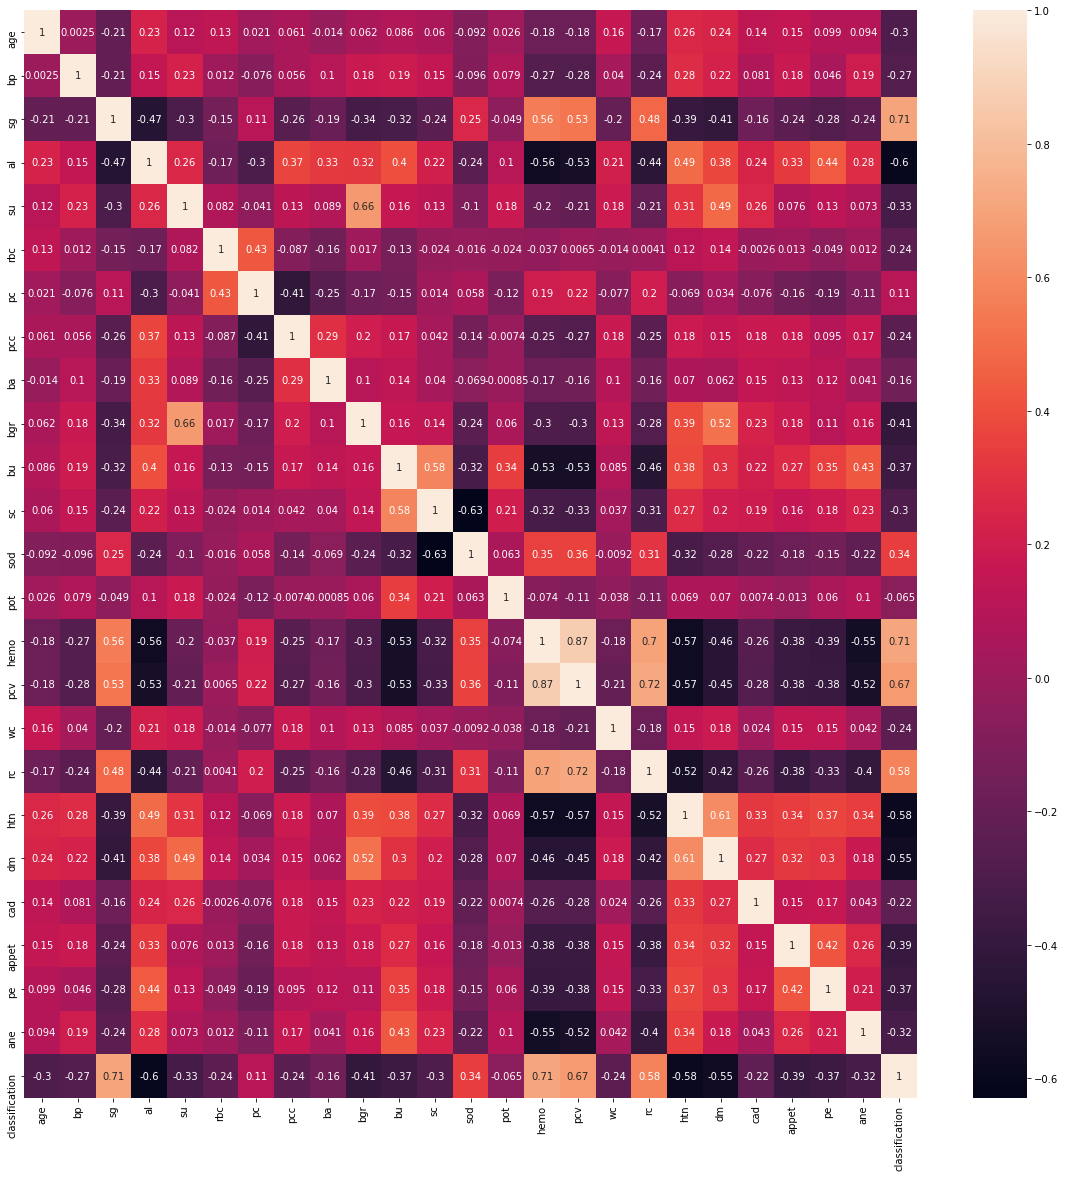

In [647]:
plt.subplots(figsize = (20,20))
sns.heatmap(dataset.corr(), annot = True)

## Outlier detectioon

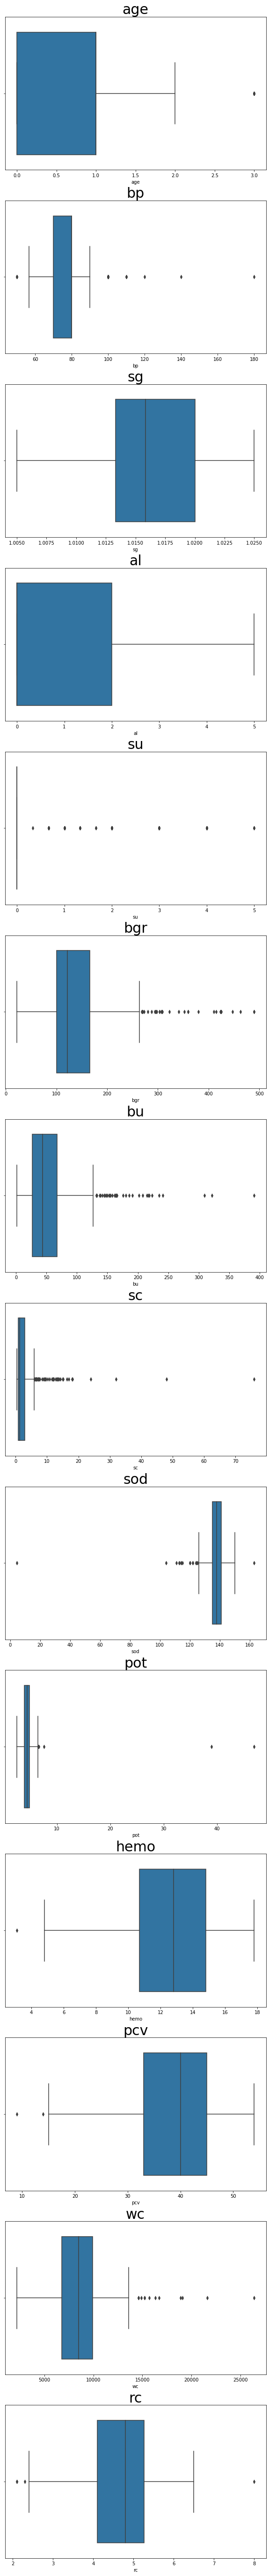

In [648]:
fig, axs = plt.subplots(nrows=len(nums), ncols=1, figsize = (10, 100))
for i, column in enumerate(nums):
    sns.boxplot(dataset[column], ax=axs[i]).set_title(column,fontsize=30)

As we have too small dataset, I decided not to drop outliers

In [649]:
def get_ranges(x):
    sorted(x)
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_range = q1 - (iqr * 1.5)
    upper_range = q3 + (iqr * 1.5)
    return lower_range, upper_range

def check_for_outliers(column):
    lower, higher = get_ranges(column)
    return column.max() > higher or column.min() < lower

for column_name in nums:
    while check_for_outliers(dataset[column_name]):
        low, high = get_ranges(dataset[column_name])
        dataset[column_name] = np.where(dataset[column_name] < low, low, dataset[column_name])
        dataset[column_name] = np.where(dataset[column_name] > high, high, dataset[column_name])

## Dataset after dealing with outliers

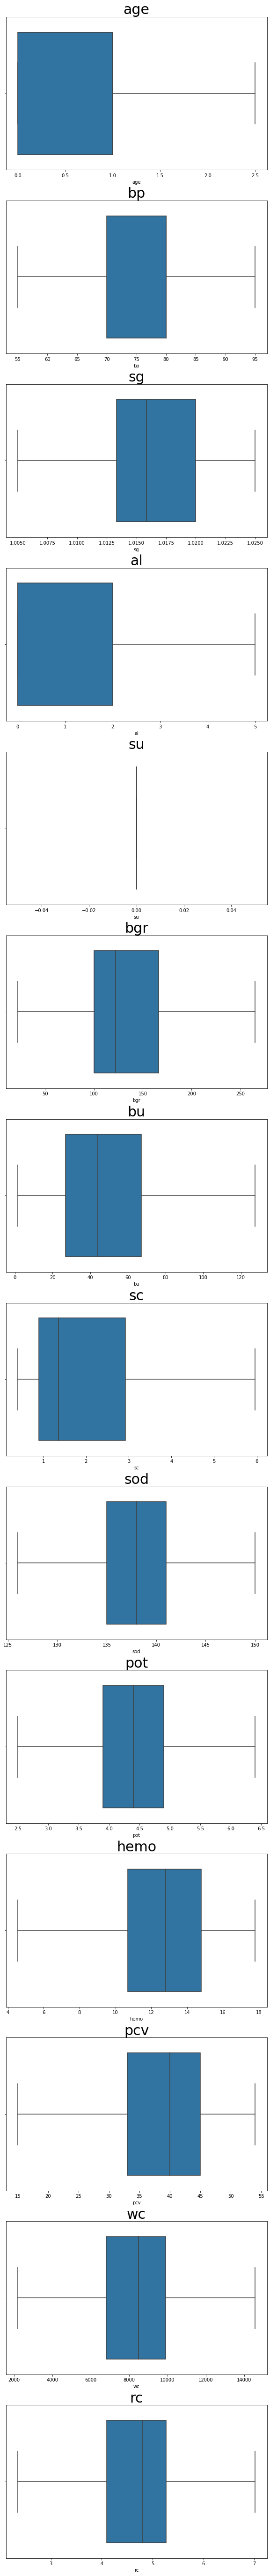

In [650]:
fig, axs = plt.subplots(nrows=len(nums), ncols=1, figsize = (10, 100))
for i, column in enumerate(nums):
    sns.boxplot(dataset[column], ax=axs[i]).set_title(column,fontsize=30)

## Check distribution

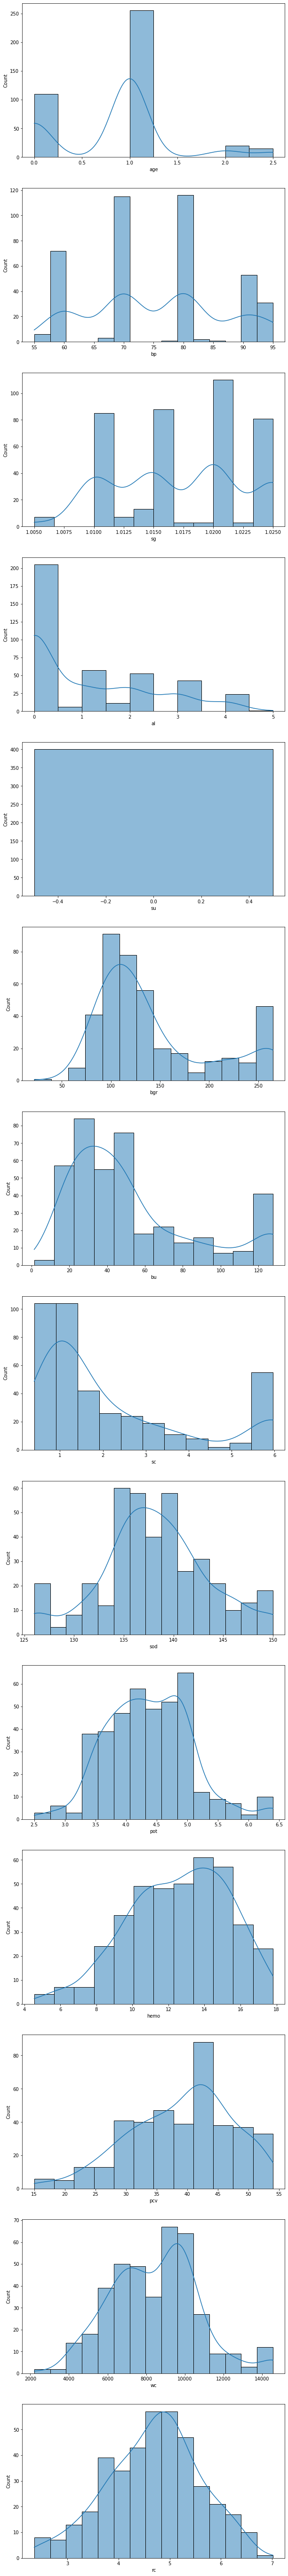

In [651]:
fig, axs = plt.subplots(nrows=len(nums), ncols=1, figsize = (10, 100))
for i, column in enumerate(nums):
    sns.histplot(dataset[column], kde = True, ax=axs[i])

## Choosing X and y data

In [652]:
X = dataset.drop('classification', axis = 1)
y = dataset['classification']

print("X:", X.shape)
print("y:", y.shape)

X: (400, 24)
y: (400,)


## Scaling the data

In [653]:
scaler = StandardScaler()
X_cols = X.columns
X[nums] = scaler.fit_transform(X[nums])

## Getting rid of Multicollinearity

In [654]:
pca = PCA()
X = pca.fit_transform(X)

## Making train & test data

In [655]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.2)
print("Train size:", y_train.shape[0])
print("Test size:", y_test.shape[0])

Train size: 320
Test size: 80


## Training the model

In [656]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Model test

Cross-val score: 0.978125
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.97      1.00      0.99        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



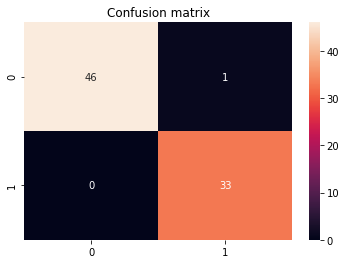

In [657]:
print("Cross-val score:", cross_val_score(xgbc, X_train,y_train, cv = 10).mean())

cm = confusion_matrix(y_test, xgbc.predict(X_test))
sns.heatmap(cm, annot = True).set_title('Confusion matrix')

print("Classification report: \n", classification_report(y_test, xgbc.predict(X_test)))

## Feature importance plot

<AxesSubplot:title={'center':'Feature importances'}, ylabel='Feature name'>

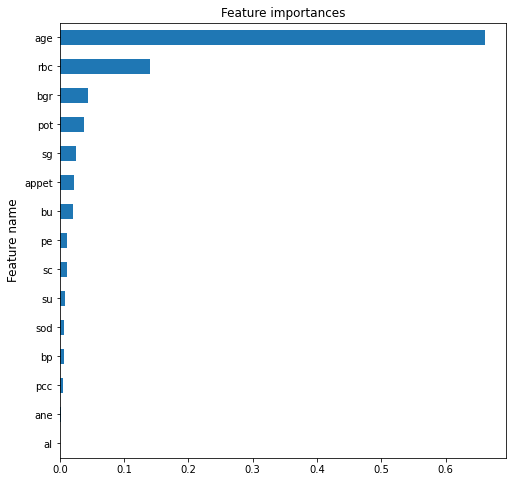

In [658]:
plt.figure(figsize=(8,8))
plt.title('Feature importances')
plt.ylabel('Feature name', fontsize = 12)
pd.Series(xgbc.feature_importances_, index=X_cols).nlargest(15).sort_values(ascending=True).plot(kind='barh')